# 2023/24-XAI-LABS
Note that this lab has three levels: basic, regular and advanced.\
Doing the **basic** part earns you a grade of 5.5-6.0.\
Doing the **regular** part earns you a max grade of 8.\
Doing the **advanced** part earns you a max grade of 10.0.

Please return a Jupyter notebook as a submission in Canvas, to make the grading easier for us.

**Group No:** 9

**Student Name**: Wan Barmawi Muhammad Razaq S2819201

**Student Name**: Hakan Tirsi S3105555

#Lecture 1
The following set of exercises are related to the Lecture 1.
## Feature Importance
### Exercises on Permutation Feature Importance
In this exercise we apply permutation feature importance to a real world dataset. We attempt is using two ways.
1. Using our own basic implmenattion of the algorithm
2. Using the exiting libraries

**Acknowledgement** : Some code is generated using chatgpt but it is tested for any errors.

In [1]:
# First of all import the required packages
# Load required libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

We'll use the 'breast_cancer' dataset from 'sklearn.datasets', which is a binary classification problem.

In [2]:
# Load dataset
data =load_breast_cancer()
X=data.data
y=data.target

Split data into train and test. Fix the random state seed and also use 20% for testing

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train a Model
One can use any classifier to train the model. Here we will use **random forest** classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
# Lets us check how well our model is doing
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



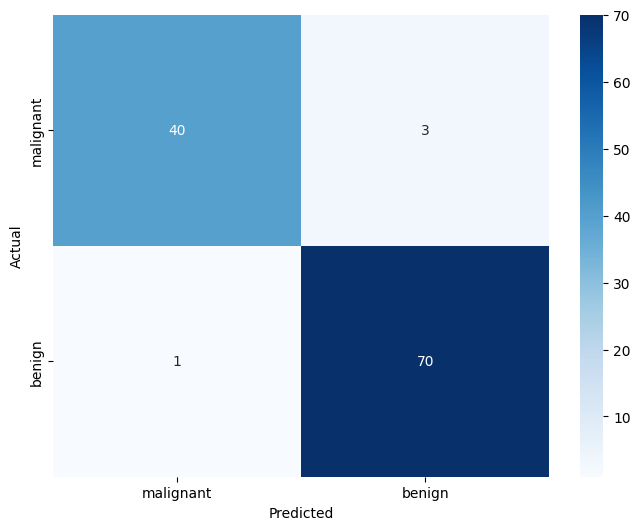

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### (Basic)Exercise 1
Provide an implementation of the basic algorithm on permutation feature importance.
*Note:*You will be graded on storage, copying, and handling of the random state.

In [7]:
from sklearn.metrics import accuracy_score
import numpy as np

def permutation_importance(model, X_test, y_test, metric, random_state=None):
  # do something with baseline accuracy

  # Where will you store computed importance

  # Think about doing it for all features.
  # Think about shuffling parts of a column
  #  Compute accuracy after shuffling
  # Compute the difference from the baseline
  # Return the accuracy.

    # Ensure reproducability (random number generator)
    rng = np.random.default_rng(random_state)
    
    # Calculate the baseline metric (accuracy)
    y_pred = model.predict(X_test)
    baseline_accuracy = metric(y_test, y_pred)
    
    # Initialize an array to hold the importance
    importances = np.zeros(X_test.shape[1])
    
    # Permute each feature and calculate the new accuracy
    for i in range(X_test.shape[1]):
        # save original column
        saved_column = X_test[:, i].copy()
        
        # shuffle the column
        rng.shuffle(X_test[:, 1])
        
        # Calculate new prediction
        new_predictions = model.predict(X_test)
        new_accuracy = metric(y_test, new_predictions)
        
        # Compute the importance
        importances[i] = baseline_accuracy - new_accuracy
        
        # Restore original data
        X_test[:, i] = saved_column
        
    return importances

# Use the feature importance function
feature_importances = permutation_importance(clf, X_test, y_test, accuracy_score, random_state=42)
print("Feature Importances:", feature_importances)
        
        
    

Feature Importances: [0.00877193 0.         0.         0.         0.         0.00877193
 0.         0.00877193 0.         0.00877193 0.00877193 0.
 0.00877193 0.         0.         0.         0.         0.00877193
 0.00877193 0.00877193 0.00877193 0.00877193 0.00877193 0.
 0.         0.         0.         0.00877193 0.00877193 0.        ]


Hakans Part Ex1 Below

Experimenting in how to make the function.

1. Compute baseline accuracy (so without shuffeling anything yet).
2. Take first column
3. Shuffle first column
4. compute accuracy 
5. save accuracy, maybe hashmap (column_name, accuracy, accuracy_diff)? Dictionary in python
6. repeat for all features
7. return the hashmap

In [8]:
from sklearn.metrics import accuracy_score
import random

metric = accuracy_score(y_test,y_pred) # Baseline accuracy from our random forst model made above.

def permutation_importance(model, X_test, y_test, metric):  
  len_array = len(X_train[0]) #Get len of the array
  base_acc = metric #Declare baseline accuracy
  myMap = {
    "Start":[base_acc,0,0]
    } # Create empty map with our base accuracy stored


  for i in range(0, len_array): #-1 because the first loop is our baseline without changeging the column order
    random.seed(4) #To Keep consistency in our shuffles
    
    # take column i of model
    shuffeled_list = X_train[:, i]
    # Shuffle the list
    random.shuffle(shuffeled_list)
    #put shuffeled list back into the array
    X_train[:, i] = shuffeled_list

    # train the model
    model.fit(X_train, y_train)
    # predict the model
    y_pred = model.predict(X_test)
    # Compute the accuracy in a variable
    newAcc = accuracy_score(y_test,y_pred)

    myMap[i] = [base_acc, newAcc, base_acc - newAcc] #Store the results as (column number: Baseline accuracy, New Accuracy, Difference (base - new))

  return myMap


permutation_importance(model= clf, X_test= X_test, y_test= y_test, metric=metric)

{'Start': [0.9649122807017544, 0, 0],
 0: [0.9649122807017544, 0.9649122807017544, 0.0],
 1: [0.9649122807017544, 0.9649122807017544, 0.0],
 2: [0.9649122807017544, 0.9649122807017544, 0.0],
 3: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 4: [0.9649122807017544, 0.9649122807017544, 0.0],
 5: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 6: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 7: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 8: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 9: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 10: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 11: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 12: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 13: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 14: [0.9649122807017544, 0.956140350877193, 0.00877192982456143],
 15: [0.9649122807017544, 0

# (Regular)Exercise 2:
In this exercise you will test and compare your implemntation. As a baseline we use the implemnattion from SKLEARN. Create tests to test your implementation thorougly. You will graded on aspects such as improving the computational feasibility, reducing the impact of randomization, efficient storage and retrivel of results, and creation of visulization.

In [9]:
from sklearn.inspection import permutation_importance as sklearn_permutatin_importance

# Use SKlearn for implementing permutation importance
sklearn_results = sklearn_permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)
sklearn_importances =sklearn_results.importances_mean

# Time for our algorithm
start_time = time.time()
custom_importances = permutation_importance(clf, X_test, y_test, accuracy_score, random_state=42)
elapsed_time = time.time() - start_time

# Time for SKlearn algorithm for permutation importance
start_time_sklearn = time.time()
sklearn_results = sklearn_permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)
elapsed_time_sklearn = time.time() - start_time_sklearn

# Compare results
print("Custom implementation time:", elapsed_time)
print("Sklearn implementation time:", elapsed_time_sklearn)

# Visualization
features = data.feature_names
fig, ax = plt.subplots()
index = range(len(features))
bar_width = 0.35

rects1 = ax.bar(index, custom_importances, bar_width, label='Custom')
rects2 = ax.bar([p + bar_width for p in index], sklearn_importances, bar_width, label='Sklearn')

ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importances by Custom and Sklearn Implementation')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(features, rotation=90)
ax.legend()

plt.show()

NameError: name 'sklearn_permutation_importance' is not defined

### How to interpret
**Zero Importance:** A feature with an importance close to zero has little to no impact on the model's predictive performance. In the context of permutation importance, this means that shuffling the feature values (randomizing them) doesn't really change the model's performance.

- **Follow-up Action:** Features with zero importance might not be necessary for the model. You could consider removing them in subsequent model training to simplify the model without sacrificing performance. However, it's essential to re-evaluate the model after removal to ensure no significant performance drop.

**Positive Importance:** This indicates that the feature has a positive effect on the model's predictive performance. Randomizing this feature's values (through permutation) worsens the model's performance.

- **Follow-up Action:** Features with positive importance are valuable to the model. They should be retained in the dataset. Further, understanding why these features are important can provide insights into the problem domain.

**Negative Importance:** A negative importance suggests that the random permutation of this feature actually improved the model's performance. This is counterintuitive and could indicate that the feature might be misleading the model when it's not permuted. However, it can also be due to noise or randomness, especially if the negative value is not significant.

- ** Follow-up Action:** It's essential to investigate features with negative importance. If consistent across multiple runs or models, consider whether the feature is correctly constructed or whether there might be data leakage. Depending on the analysis, you might choose to remove or modify such features.

**General Tips:**
- Before making decisions based solely on permutation importance, consider other methods of feature importance or selection to get a holistic view.
- Domain knowledge is invaluable. Feature importance should be interpreted in the context of the problem domain. For instance, even if a feature has low importance, it might be kept for reasons of interpretability or domain significance.
- Always retrain and re-evaluate the model after making changes based on feature importance to ensure that the model's performance remains consistent or improves.

### (Advanced)Exercise 3
- Using the above guideline interpret the feature importance plot.
- What will be the impact of using different classifier? The question can be answered by running a comparative study for different classifier.

Excersie 3 --> Wan

### (Advanced) Exercise 4
Create a dataset with 2 features and a target, such that the pdp of the first feature is flat, but its permutation importance is high. We will use a RandomForest for the model.

**Exercise credit**: https://www.kaggle.com/code/dansbecker/exercise-partial-plots

Ex 4 --> Hakan

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set a random seed for reproducibility


# Generate synthetic data
n_samples = 1000
X1 =
X2 =

# Target with interaction: y is only affected by the interaction of X1 and X2
y =

# Create DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2']], data['y'], test_size=0.2, random_state=0)


In [ ]:
# Initialize and train RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)


In [ ]:
# Plot Partial Dependence for Feature 1
fig, ax = plt.subplots(figsize=(8, 4))
plot_partial_dependence(model, X_train, features=[0], ax=ax)  # Feature index 0 for X1
plt.title("Partial Dependence of Feature 1")
plt.show()

# Calculate Permutation Importance for Feature 1
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
print("Permutation Importance of Feature 1:", result.importances_mean[0])


### Analyse the results obtained via the code given above.

Ex 5 --> Hakan

### (Regular) Exercise 5
In this exercise we will evaluate the impact of feature engineeing on model predictions.
The exercise can be approach from different perspective. However, you can choose the following steps:


*   Choose a data set (see starter code below)
*   build the model
*  generate [ALE plots](https://github.com/blent-ai/ALEPython)
* Apply some feature engineering ( e.g. binning or normalization or any other).
* Build model again with engineerd features
* generate again ALE plots for engineered features
* analyse both graphs (think about magnitude of effect, shape, direction etc).

Starter code is given below:




#### Without normalization

In [1]:
# load required packages
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split




In [2]:
# load datasets
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['progression'] = diabetes_data.target
# split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('progression', axis=1),
    df['progression'], test_size=0.2, random_state=42)

In [3]:
# Train the model [fee free to choose another one]
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

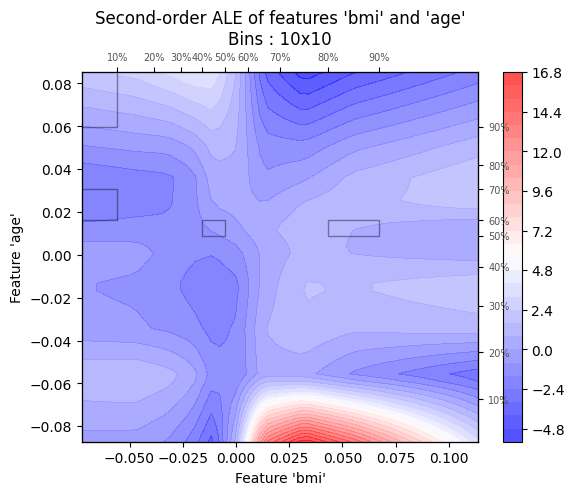

<Axes: title={'center': "Second-order ALE of features 'bmi' and 'age'\nBins : 10x10"}, xlabel="Feature 'bmi'", ylabel="Feature 'age'">

In [6]:
from alepython import ale_plot
ale_plot(model, X_train, ['bmi', 'age'], monte_carlo=True)

#### Applying Z Normalization

In [8]:
diabetes_data = load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
df['progression'] = diabetes_data.target

In [16]:
bmiMean = np.mean(df['bmi'])
bmiStdev = np.std(df['bmi'], ddof=1)

df["bmiZscore"]=  (df['bmi'] - bmiMean) / bmiStdev

In [18]:
ageMean = np.mean(df['age'])
ageStdev = np.std(df['age'], ddof=1)

df["ageZscore"]=  (df['age'] - ageMean) / ageStdev

In [19]:
df['progression'] = diabetes_data.target
# split data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('progression', axis=1),
    df['progression'], test_size=0.2, random_state=42)


In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

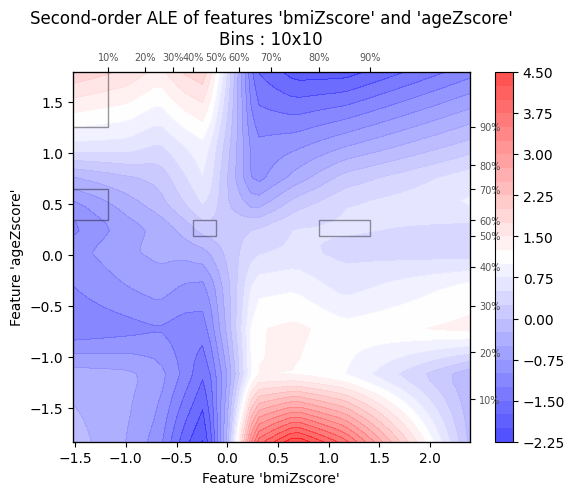

<Axes: title={'center': "Second-order ALE of features 'bmiZscore' and 'ageZscore'\nBins : 10x10"}, xlabel="Feature 'bmiZscore'", ylabel="Feature 'ageZscore'">

In [22]:
from alepython import ale_plot
ale_plot(model, X_train, ['bmiZscore', 'ageZscore'], monte_carlo=True)

Hakan Note: Apply Z-Score normalziation

## (Optional) Exercise
**Note:**I created this exercise, but I am not sure how much doable it is for students (though I have solution). So, if someone tried it and have suggestion please let me know.

In this exercise, you will implement a basic ALE algorithm using Python. You will also explore the impact of different binning strategies on the ALE computation and assess various factors such as accuracy, computational efficiency, and ease of implementation.

1. Implement a Basic ALE Algorithm: Implement a function that calculates the ALE for a single continuous feature. Use the provided synthetic dataset for testing your function.

2. Experiment with Binning Strategies: Investigate how different binning strategies (equal-width, equal-frequency, and custom bins) affect the ALE calculation. Discuss the trade-offs in terms of accuracy, computational efficiency, and implementation complexity.

3. Testing and Validation: Write tests to validate the correctness of your ALE implementation. Check if the accumulated effects increase monotonically for synthetic linear relationships.

Dataset
A synthetic dataset is provided below for you to use in this exercise.


In [ ]:
# Synthetic Dataset Generation
import numpy as np
import pandas as pd

np.random.seed(0)
X = np.random.uniform(0, 1, size=(100, 1))
y = 3 * X.squeeze() + np.random.normal(0, 0.1, size=100)

data = pd.DataFrame({'Feature': X.squeeze(), 'Target': y})
data.head()

In [ ]:
# ALE Algorithm Implementation
def calculate_ale(feature_values, model_predictions, n_bins=10):
    # Ensure feature_values are sorted


    # Compute the bin edges and intervals


    # Calculate the ALE values per bin


        # Calculate the differences within each bin


        # Calculate the accumulated effect


    # Get the center of each bin


    return bin_centers, ale_effects



In [ ]:
# Test the function with a linear model
from sklearn.linear_model import LinearRegression

# Create a simple linear model
model = LinearRegression()
model.fit(data[['Feature']], data['Target'])

# Predictions from the model
predictions = model.predict(data[['Feature']])

# Calculate ALE
feature_centers, ale_effects = calculate_ale(data['Feature'].values, predictions)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(feature_centers, ale_effects, marker='o')
plt.title('ALE Plot for the Feature')
plt.xlabel('Feature Value')
plt.ylabel('Accumulated Local Effect')
plt.grid(True)
plt.show()